## Problem set for class 5

1. Consider the 7 different batsman data provided to you. Compute the mean,
   median, mode, standard deviation for each of these batsmen. Store the names
   of the batsmen in a list. Then store the mean/median/mode for each batsman
   in the same order.  You should have 5 lists with you at the end of this.

In [9]:
import numpy as np
from scipy import stats

# batsman data files
batsmen = ['dhoni.txt', 'gambhir.txt', 'kapil_dev.txt',
           'kohli.txt', 'rohit.txt', 'sachin.txt', 'sehwag.txt']

# lists to store results
mean_list = []
median_list = []
mode_list = []
stddev_list = []
names = []

for file in batsmen:
    # load scores directly as numpy array
    scores = np.loadtxt('data/'+file, dtype=int)

    names.append(file.replace('.txt',''))
    # compute statistics
    mean_list.append(np.mean(scores))
    median_list.append(np.median(scores))
    
    mode_result = stats.mode(scores, keepdims=True)
    mode_list.append(mode_result.mode[0])   # mode value
    
    stddev_list.append(np.std(scores, ddof=1))  # sample std dev

# final lists
print("Batsmen:", names)
print("Means:", mean_list)
print("Medians:", median_list)
print("Modes:", mode_list)
print("Standard Deviations:", stddev_list)

Batsmen: ['dhoni', 'gambhir', 'kapil_dev', 'kohli', 'rohit', 'sachin', 'sehwag']
Means: [np.float64(33.861111111111114), np.float64(36.62937062937063), np.float64(19.106060606060606), np.float64(48.9), np.float64(42.14339622641509), np.float64(40.76548672566372), np.float64(33.76734693877551)]
Medians: [np.float64(21.5), np.float64(27.0), np.float64(12.5), np.float64(36.5), np.float64(25.0), np.float64(28.5), np.float64(23.0)]
Modes: [np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0)]
Standard Deviations: [np.float64(35.31587949083732), np.float64(35.30125448069745), np.float64(21.156268073992713), np.float64(42.90925888744638), np.float64(44.94089346117434), np.float64(40.0394800064396), np.float64(34.80941899427947)]


2. Make a barchart comparing each of the batsmen. That is make 3 plots, one
   showing mean of all the batsmen (with suitable ticks), one plot for the
   median and one for the mode.

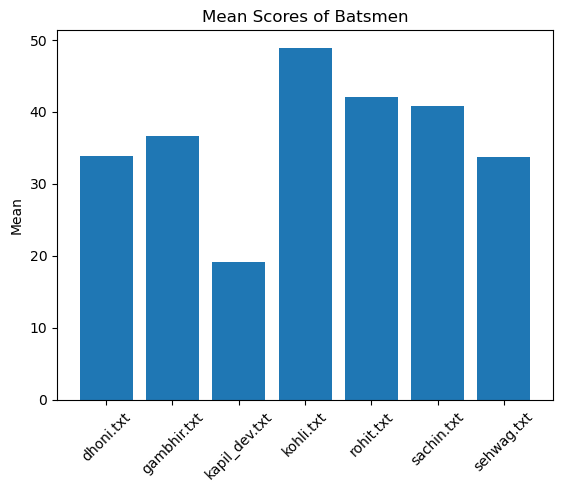

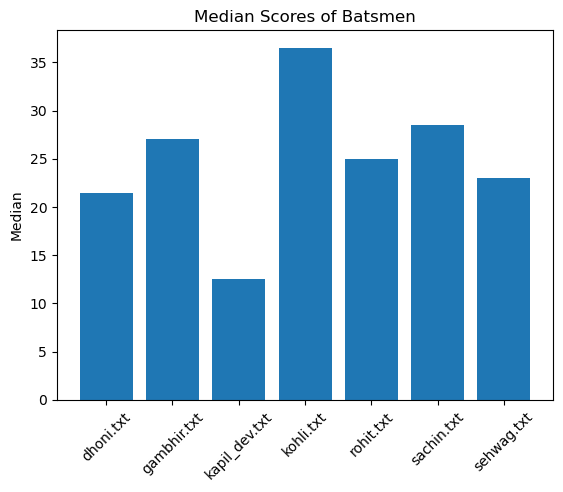

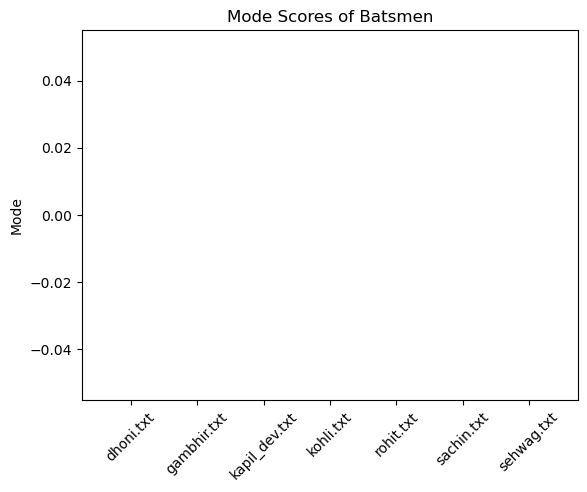

In [4]:
import matplotlib.pyplot as plt

# --- Bar chart for mean ---
plt.bar(batsmen, mean_list)
plt.xticks(rotation=45)
plt.title("Mean Scores of Batsmen")
plt.ylabel("Mean")
plt.show()

# --- Bar chart for median ---
plt.bar(batsmen, median_list)
plt.xticks(rotation=45)
plt.title("Median Scores of Batsmen")
plt.ylabel("Median")
plt.show()

# --- Bar chart for mode ---
plt.bar(batsmen, mode_list)
plt.xticks(rotation=45)
plt.title("Mode Scores of Batsmen")
plt.ylabel("Mode")
plt.show()

3. Look up the documentation for `plt.errorbar` (you can look this up online
   also) and draw the means of each batsman along with an error bar
   illustrating the standard deviation of their scores.

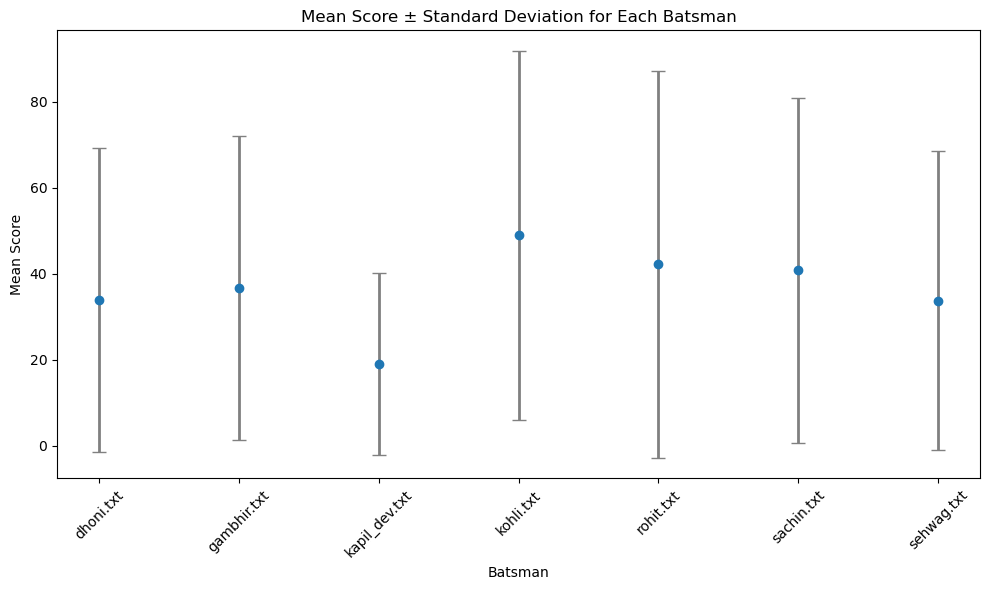

In [5]:
# Convert names to positions for x-axis
x = np.arange(len(batsmen))

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(x, mean_list, yerr=stddev_list, fmt='o', capsize=5, ecolor='gray', elinewidth=2)

# Label and style
plt.xticks(x, batsmen, rotation=45)
plt.xlabel('Batsman')
plt.ylabel('Mean Score')
plt.title('Mean Score ± Standard Deviation for Each Batsman')
plt.tight_layout()
plt.show()

4. Plot a suitable histogram for any 4 of the batsmen and compare them, you
   can make 2 plots of two pairs or 3 plots of any 3 pairs.

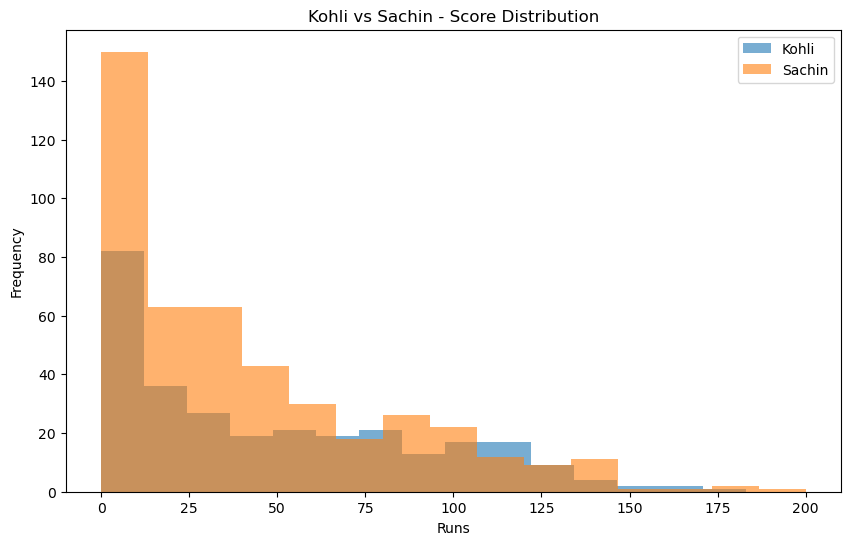

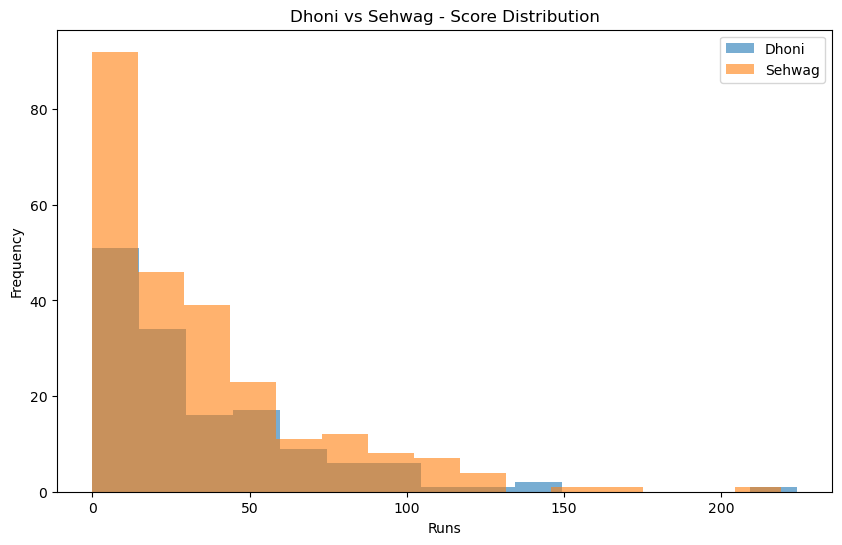

In [7]:
# Choose any 4 batsmen (example)
files = {
    'kohli': 'kohli.txt',
    'sachin': 'sachin.txt',
    'dhoni': 'dhoni.txt',
    'sehwag': 'sehwag.txt'
}

# Load data into a dictionary
scores = {}
for name in files:
    scores[name] = np.loadtxt('data/'+files[name], dtype=int)

# --- Plot 1: Kohli vs Sachin ---
plt.figure(figsize=(10, 6))
plt.hist(scores['kohli'], bins=15, alpha=0.6, label='Kohli')
plt.hist(scores['sachin'], bins=15, alpha=0.6, label='Sachin')
plt.title("Kohli vs Sachin - Score Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# --- Plot 2: Dhoni vs Sehwag ---
plt.figure(figsize=(10, 6))
plt.hist(scores['dhoni'], bins=15, alpha=0.6, label='Dhoni')
plt.hist(scores['sehwag'], bins=15, alpha=0.6, label='Sehwag')
plt.title("Dhoni vs Sehwag - Score Distribution")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend()
plt.show()

5. Make a boxplot comparing all batsmen.

C:\Users\Hassan\AppData\Local\Temp\ipykernel_11332\1274891957.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(scores, labels=labels)


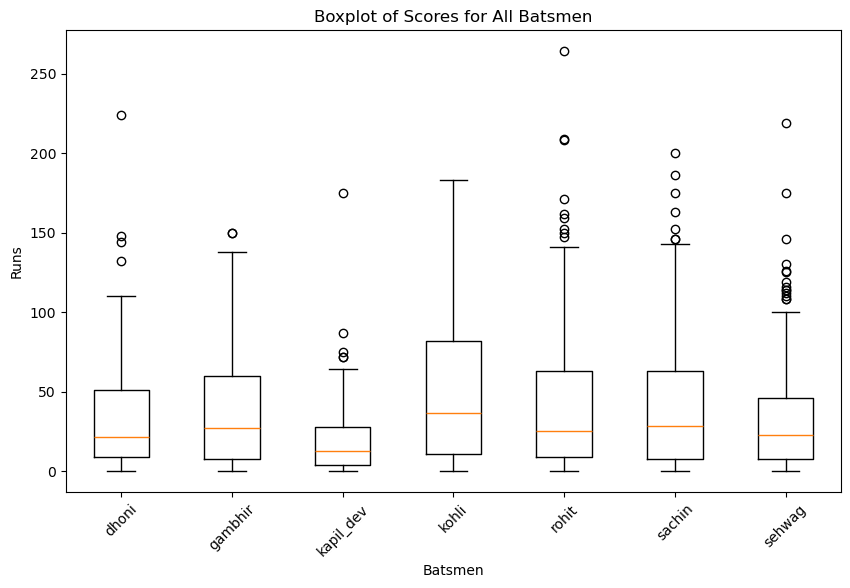

In [10]:
scores = []
for file in batsmen:
    scores.append(np.loadtxt('data/'+file, dtype=int))
labels = []
for name in batsmen:
    labels.append(name.replace('.txt', ''))
plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=labels)
plt.title("Boxplot of Scores for All Batsmen")
plt.xlabel("Batsmen")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()

6. Make a violinplot comparing all batsmen.

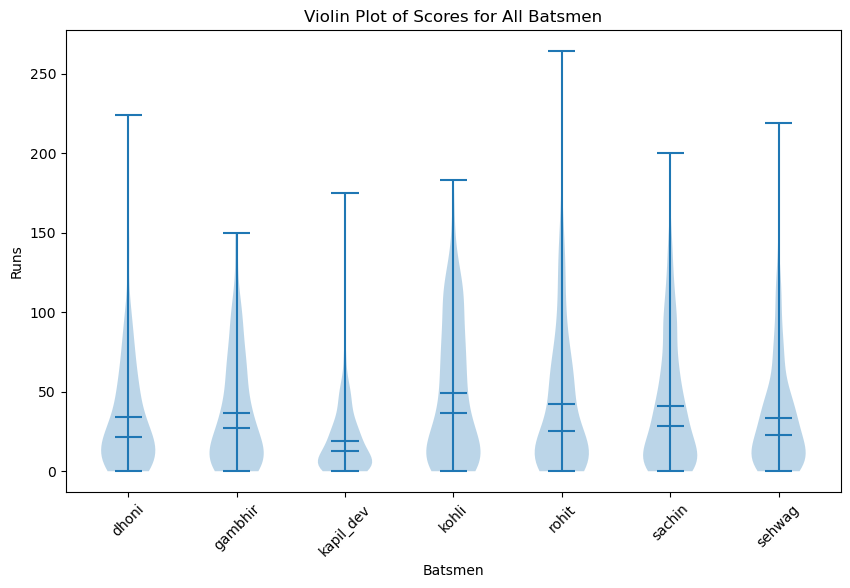

In [11]:
plt.figure(figsize=(10, 6))
plt.violinplot(scores, showmeans=True, showmedians=True)
plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=45)

# Title and labels
plt.title("Violin Plot of Scores for All Batsmen")
plt.xlabel("Batsmen")
plt.ylabel("Runs")
plt.show()

7. Comment on whether it is possible to plot all 7 batsmen together as a
   histogram? Is this a good idea? Contrast this with the boxplot and
   violinplot.

In [13]:
# Is it possible? Yes—you can overlay 7 histograms (with transparency) or stack them.
# Is it a good idea? Usually no. With 7 batsmen, histograms get cluttered and hard to read.

# Why boxplots and violinplots are better here:

# Compact comparison: One glyph per batsman—easy to scan across 7.
# Key summaries: Boxplot shows median, IQR, whiskers, outliers—robust to skew/outliers and not sensitive to binning

# If you must compare all 7 distributions, Prefer boxplot or violinplot.